<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Keras_Basic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining tensorflow version

In [3]:
%tensorflow_version 2.x

## Importing libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import model_from_json

from matplotlib import pyplot as plt

import numpy as np

## Creating simple function

In [6]:
def function(x):
  return 10*x**2 - 5*x - 0.5

## Generating random data

In [32]:
x_train = np.random.rand(10000)
y_train = function(x_train)

x_test = np.linspace(0,1,100)
y_test = function(x_test)

## Visualization

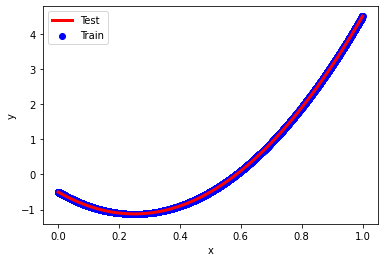

In [33]:
plt.scatter(x_train,y_train,label='Train',color='blue')
plt.plot(x_test,y_test,label='Test',color='red',lw=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

## Define deep learning model

In [88]:
model = Sequential()
model.add(Dense(200,input_dim=1))
model.add(Activation('sigmoid'))
model.add(Dense(units=20))
model.add(Activation('sigmoid'))
model.add(Dense(units=1))

In [ ]:
model.summary()

## Compiling model

In [83]:
model.compile(loss='mean_squared_error', optimizer=Adam())

## Training

In [84]:
history = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 2.3202 - val_loss: 1.7156
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.9339 - val_loss: 0.4491
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3687 - val_loss: 0.3354
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2877 - val_loss: 0.2586
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2133 - val_loss: 0.1922
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1435 - val_loss: 0.1172
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0949 - val_loss: 0.0849
Epoch 8/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0656 - val_loss: 0.0548
Epoch 9/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0434
Epoch 10/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0341 - val_loss: 0.0301

## Cost values on train and validation

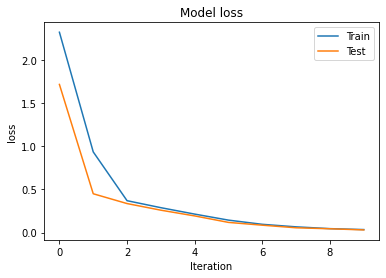

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Iteration')
plt.legend(['Train','Test'],loc='best')
plt.show()

## Prediction

In [86]:
y_predictions = model.predict(x_test)

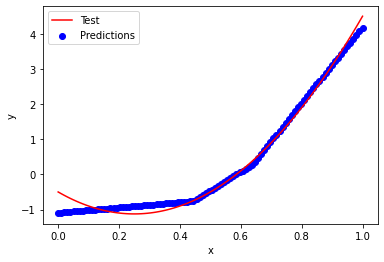

In [87]:
plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

## Saving model into file

In [59]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

## Restoring file

In [61]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
restored_model = model_from_json(loaded_model_json)
restored_model.load_weights("weights.h5")

## Prediction with restored model

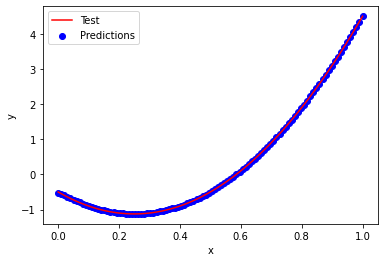

In [63]:
y_predictions = restored_model.predict(x_test, batch_size=1)

plt.scatter(x_test, y_predictions, label='Predictions', color='blue')
plt.plot(x_test, y_test, label='Test', color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()